# 1. 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

pd.set_option('max.columns', 100)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

from scipy import stats

# 2. 데이터 불러오기

In [3]:
# 데이터 확인
raw_data = pd.read_csv('data/train_mdf.csv')

print('Shape of Data :', raw_data.shape, '\n')
print('-' * 50)
print(raw_data.info())

Shape of Data : (1460, 81) 

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1

In [4]:
# 데이터의 앞부분 확인
display(raw_data.head())

# 데이터의 뒷부분 확인
display(raw_data.tail())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


# 3. 결측치 처리

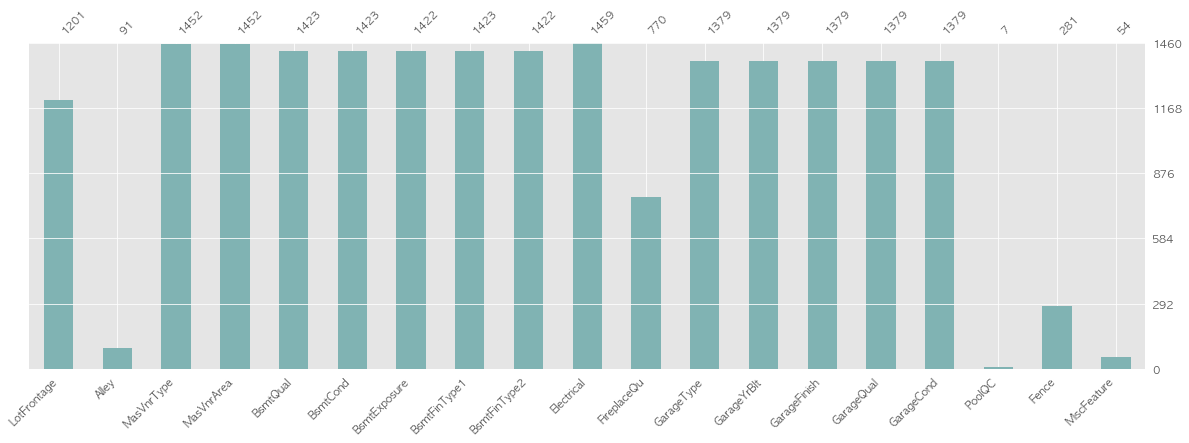

In [4]:
# 결측치를 포함하고 있는 features 추출
null_data = pd.DataFrame(raw_data.isnull().sum(), columns = ['Count'])
null_list = null_data[null_data['Count'] > 0].index

# 추출 후 시각화
msno.bar(raw_data[null_list], color = (0.5, 0.7, 0.7), fontsize = 11, figsize = (20, 6))
plt.yticks([])
plt.show()

- 위의 시각화를 통해, 총 19개의 변수에서 결측치가 존재함을 확인할 수 있다.


- 하지만, [Kaggle: House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) 사이트의 설명을 통해 범주형 변수 **Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature** 총 14개 변수의 결측치는 결측치를 의미하는 것이 아니라, 해당 시설이 없다는 것을 의미한다.


- 또한, **GarageYrBlt** 변수의 결측치는 해당 관측치에 Garage가 존재하지 않아서 결측치가 입력되었음을 알 수 있다.


- 따라서, 14개의 범주형 변수 결측치에는 해당 변수의 시설이 없다는 의미로 **'No have'** 를 채워주고, **GarageYrBlt** 변수의 결측치에는 변수 타입을 통일시키기 위해 **'9999'** 의 값을 넣어주도록 하자.

In [5]:
object_list = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
               'PoolQC', 'Fence', 'MiscFeature']

# 원래 데이터를 보존하기 위해 새로운 DataFrame 생성
modify_data = raw_data.copy()

# 결측치를 의미하지 않는 값에 'No have' 채워넣기
for feature in object_list:
    null_data = modify_data[feature].isnull().sum()
    print('Number of null values of {} *Before Modify* :'.format(feature), null_data, '\n')
    
    modify_data.loc[modify_data[feature].isnull(), feature] = 'No have'
    
    null_data = modify_data[feature].isnull().sum()
    print('Number of null values of {} *After Modify* :'.format(feature), null_data)
    print('-' * 60)

Number of null values of Alley *Before Modify* : 1369 

Number of null values of Alley *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtQual *Before Modify* : 37 

Number of null values of BsmtQual *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtCond *Before Modify* : 37 

Number of null values of BsmtCond *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtExposure *Before Modify* : 38 

Number of null values of BsmtExposure *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtFinType1 *Before Modify* : 37 

Number of null values of BsmtFinType1 *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtFinType2 *Before Modify* : 38 

Number of null values of BsmtFinType2 *After Modify* : 0
---------------

In [6]:
print('Number of null values of GarageYrBlt *Before Modify* :', modify_data['GarageYrBlt'].isnull().sum(), '\n')

# 결측치 대체
modify_data.loc[modify_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 9999
print('Number of null values of GarageYrBlt *After Modify* :', modify_data['GarageYrBlt'].isnull().sum())

Number of null values of GarageYrBlt *Before Modify* : 81 

Number of null values of GarageYrBlt *After Modify* : 0


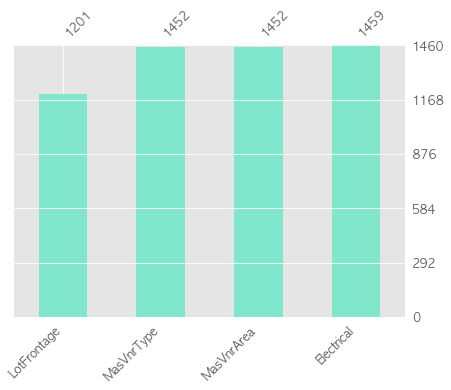

In [7]:
# 변경해준 뒤 결측치 확인
null_data = pd.DataFrame(modify_data.isnull().sum(), columns = ['Count'])
null_list = null_data[null_data['Count'] > 0].index

# 추출 후 시각화
msno.bar(modify_data[null_list], color = (0.5, 0.9, 0.8), fontsize = 12, figsize = (7, 5))
plt.yticks([])
plt.show()

- 결측치를 포함하고 있는 범주형 변수 : **MasVnrType, Electrical**


- 결측치를 포함하고 있는 수치형 변수 : **LotFrontage, MasVnrArea**

In [8]:
print('Number of incorrectly entered value *Wd Shng* :',
      len(modify_data[modify_data['Exterior2nd'] == 'Wd Shng']), '\n')

print('Number of incorrectly entered value *CmentBd* :',
      len(modify_data[modify_data['Exterior2nd'] == 'CmentBd']), '\n')

print('Number of incorrectly entered value *Brk Cmn* :',
      len(modify_data[modify_data['Exterior2nd'] == 'Brk Cmn']))

Number of incorrectly entered value *Wd Shng* : 38 

Number of incorrectly entered value *CmentBd* : 60 

Number of incorrectly entered value *Brk Cmn* : 7


- **Exterior2nd** 변수를 확인해보면, 변수 설명과 다르게 잘못 기입된 값이 있다.


- 잘못 기입된 범주는 총 3개이며, 105개의 관측치가 그러함을 볼 수 있다.


- 잘못 기입된 값들을 올바르게 변경해주도록 하자.

In [9]:
modify_data.loc[modify_data['Exterior2nd'] == 'Wd Shng', 'Exterior2nd'] = 'Wd Sdng'
modify_data.loc[modify_data['Exterior2nd'] == 'CmentBd', 'Exterior2nd'] = 'CemntBd'
modify_data.loc[modify_data['Exterior2nd'] == 'Brk Cmn', 'Exterior2nd'] = 'BrkComm'

print('Number of incorrectly entered value *Wd Shng* :',
      len(modify_data[modify_data['Exterior2nd'] == 'Wd Shng']), '\n')

print('Number of incorrectly entered value *CmentBd* :',
      len(modify_data[modify_data['Exterior2nd'] == 'CmentBd']), '\n')

print('Number of incorrectly entered value *Brk Cmn* :',
      len(modify_data[modify_data['Exterior2nd'] == 'Brk Cmn']))

Number of incorrectly entered value *Wd Shng* : 0 

Number of incorrectly entered value *CmentBd* : 0 

Number of incorrectly entered value *Brk Cmn* : 0


# 4. 수치형 변수 (Numerical Variable) EDA

## 4.1. 이산형 변수 (Discrete Variable)

In [11]:
dis_list = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
            'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
print('Number of discrete variable :', len(dis_list), '\n')

# 이산형 변수의 데이터만 추출
dis_data = modify_data[dis_list]

# 데이터의 일부분 확인
display(dis_data.head())

Number of discrete variable : 9 



,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
0,1,0,2,1,3,1,8,0,2
1,0,1,2,0,3,1,6,1,2
2,1,0,2,1,3,1,6,1,2
3,1,0,1,0,3,1,7,1,3
4,1,0,2,1,4,1,9,1,3


In [16]:
# 이산형 변수를 확인하는 함수 만들기
def dis_data_check(data = modify_data, feature = 'BsmtFullBath'):
    
    print('Number of unique values of {} :'.format(feature), len(data[feature].unique()), '\n')
    print('Unique values of {} :'.format(feature), np.sort(data[feature].unique()), '\n')
    
    # 이산형 변수에서도 최빈값을 출력
    print('The mode of {} :'.format(feature), data[feature].mode()[0], '\n')
    
    # 이산형 변수도 마찬가지로 Bar Plot만 그려주도록 한다.
    plt.figure(figsize = (12, 5))
    
    plot_data = pd.DataFrame(data[feature].value_counts().sort_index())
    
    sns.barplot(x = plot_data.index, y = feature, data = plot_data)
    plt.ylabel('')
    
    for index, [value] in enumerate(plot_data.values):
        plt.text(index, value, value, ha = 'center', fontsize = 13)
    
    plt.show()

### [1]. BsmtFullBath

**BsmtFullBath** : Basement full bathrooms (지하실 full bathrooms의 개수)

Number of unique values of BsmtFullBath : 4 

Unique values of BsmtFullBath : [0 1 2 3] 

The mode of BsmtFullBath : 0 



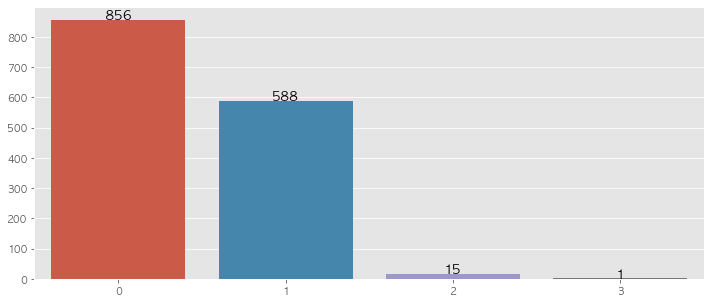

In [17]:
dis_data_check(data = modify_data, feature = 'BsmtFullBath')

### [2]. BsmtHalfBath

**BsmtHalfBath** : Basement half bathrooms (지하실 half bathroomsds의 개수)

Number of unique values of BsmtHalfBath : 3 

Unique values of BsmtHalfBath : [0 1 2] 

The mode of BsmtHalfBath : 0 



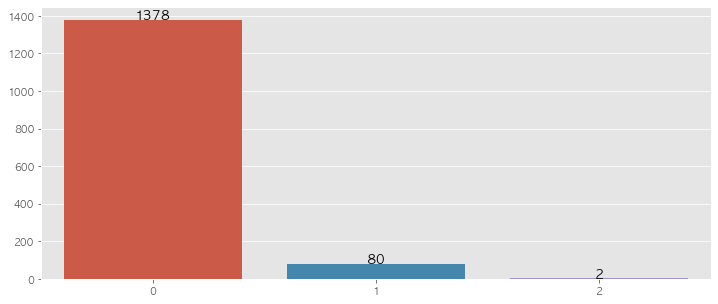

In [18]:
dis_data_check(data = modify_data, feature = 'BsmtHalfBath')

### [3]. FullBath

**FullBath** : Full bathrooms above grade (지상의 full bathrooms의 개수)

Number of unique values of FullBath : 4 

Unique values of FullBath : [0 1 2 3] 

The mode of FullBath : 2 



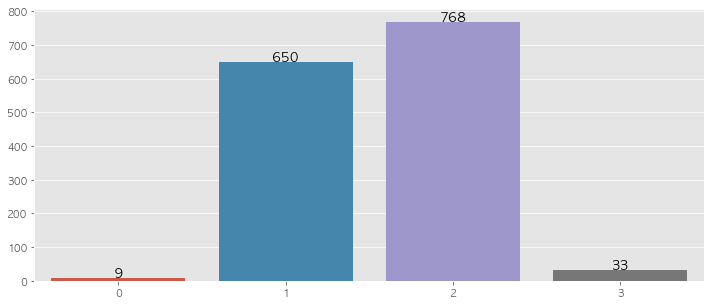

In [19]:
dis_data_check(data = modify_data, feature = 'FullBath')

### [4]. HalfBath

**HalfBath** : Half baths above grade (지상의 half bedrooms의 개수)

Number of unique values of HalfBath : 3 

Unique values of HalfBath : [0 1 2] 

The mode of HalfBath : 0 



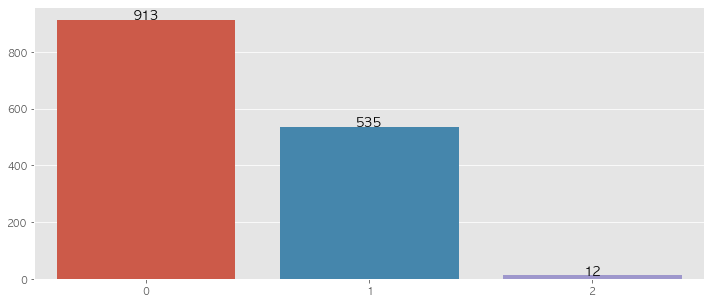

In [20]:
dis_data_check(data = modify_data, feature = 'HalfBath')

### [5]. BedroomAbvGr

**BedroomAbvGr** : Bedrooms above grade (does NOT include basement bedrooms) (지하를 포함하지 않은 지상의 침실 수)

Number of unique values of BedroomAbvGr : 8 

Unique values of BedroomAbvGr : [0 1 2 3 4 5 6 8] 

The mode of BedroomAbvGr : 3 



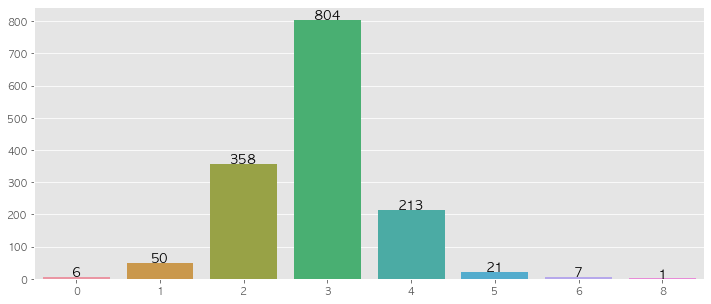

In [21]:
dis_data_check(data = modify_data, feature = 'BedroomAbvGr')

### [6]. KitchenAbvGr

**Kitchen** : Kitchens above grade (지상 주방의 개수)

Number of unique values of KitchenAbvGr : 4 

Unique values of KitchenAbvGr : [0 1 2 3] 

The mode of KitchenAbvGr : 1 



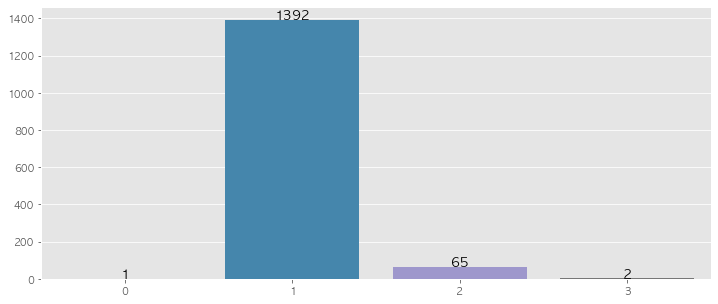

In [22]:
dis_data_check(data = modify_data, feature = 'KitchenAbvGr')

### [7]. TotRmsAbvGrd

**TotRmsAbvGrd** : Total rooms above grade (does not include bathrooms) (욕실을 포함하지 않은 지상의 방의 개수)

Number of unique values of TotRmsAbvGrd : 12 

Unique values of TotRmsAbvGrd : [ 2  3  4  5  6  7  8  9 10 11 12 14] 

The mode of TotRmsAbvGrd : 6 



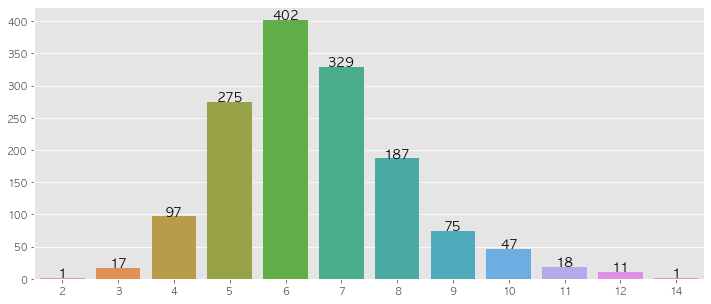

In [23]:
dis_data_check(data = modify_data, feature = 'TotRmsAbvGrd')

### [8]. Fireplaces

**Fireplaces** : Number of fireplaces (벽난로의 개수)

Number of unique values of Fireplaces : 4 

Unique values of Fireplaces : [0 1 2 3] 

The mode of Fireplaces : 0 



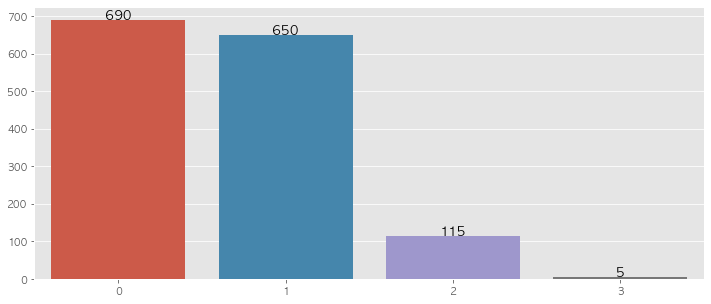

In [24]:
dis_data_check(data = modify_data, feature = 'Fireplaces')

### [9]. GarageCars

**GarageCars** : Size of garage in car capacity (차고에 들어갈 수 있는 차의 수)

Number of unique values of GarageCars : 5 

Unique values of GarageCars : [0 1 2 3 4] 

The mode of GarageCars : 2 



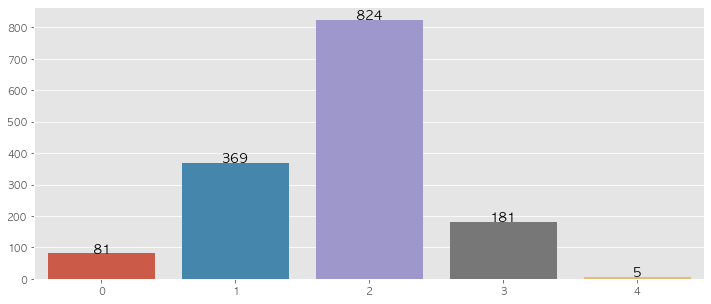

In [25]:
dis_data_check(data = modify_data, feature = 'GarageCars')

## 4.2. 연속형 변수 (Continuous Variable)

In [26]:
con_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
print('Number of continuous variable :', len(con_list), '\n')

# 연속형 변수의 데이터만 추출
con_data = modify_data[con_list]

# 데이터의 일부분 확인
display(con_data.head())

Number of continuous variable : 20 



,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


Number of null values of LotFrontage : 259 

Number of null values of MasVnrArea : 8 



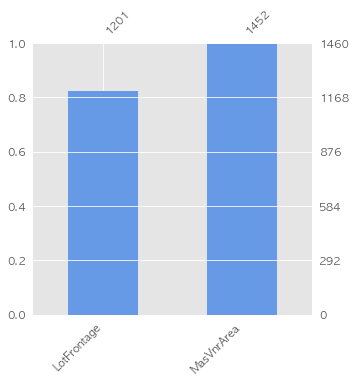

In [27]:
# 연속형 데이터에서의 결측치 확인
con_null_data = pd.DataFrame(con_data.isnull().sum(), columns = ['Count'])
con_null_list = con_null_data[con_null_data['Count'] > 0].index

for feature in con_null_list:
    print('Number of null values of {} :'.format(feature), con_data[feature].isnull().sum(), '\n')

# 결측치 시각화
msno.bar(con_data[con_null_list], color = (0.4, 0.6, 0.9), fontsize = 11, figsize = (5, 5))
plt.show()

In [29]:
# 연속형 변수를 탐색하는 과정을 함수 만들기
def con_data_check(data = modify_data, feature = 'LotFrontage', weight = 1.5):
    
    # 결측치가 있다면 결측치를 제거해준 뒤, IQR을 사용하여 이상치 확인
    data = data[~data[feature].isnull()]
    
    quan_25 = np.percentile(data[feature], 25)
    quan_75 = np.percentile(data[feature], 75)
    
    IQR = quan_75 - quan_25
    IQR_weight = IQR * weight
    
    lowest = quan_25 - IQR_weight
    highest = quan_75 + IQR_weight
    
    # 이상치의 개수 저장
    count_outlier = len(data[(data[feature] < lowest) | (data[feature] > highest)])
    print('Number of outliers in {} :'.format(feature), count_outlier, '\n')
    
    # 해당 변수의 평균과 중간값 출력
    print('The mean of {} :'.format(feature), round(data[feature].mean(), 1), '\n')
    print('The median of {} :'.format(feature), round(data[feature].median(), 1), '\n')
    
    # 해당 변수의 요약통계량 확인
    display(pd.DataFrame(data[feature].describe()))
    
    # 시각화 과정
    fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))
    
    # Histogram
    line_kws = {'linewidth' : 5, 'linestyle' : '--'}
    sns.histplot(data[feature], color = 'skyblue', kde = True, line_kws = line_kws, ax = axes[0])
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    
    # Box & Swarm Plot
    sns.boxplot(data[feature], color = 'salmon', ax = axes[1])
    sns.swarmplot(data[feature], color = 'blueviolet', alpha = 0.3, ax = axes[1])
    axes[1].axvline(highest, color = 'red', linewidth = 4, alpha = 0.5, linestyle = '--')
    axes[1].set_xlabel('')
    
    if lowest > 0:
        axes[1].axvline(lowest, color = 'red', linewidth = 4, alpha = 0.5, linestyle = '--')
    
    fig.tight_layout()

### [1]. LotFrontage

**LotFrontage** : Linear feet of street connected to property (건물과 연결된 도로의 직선 거리)

Number of outliers in LotFrontage : 88 

The mean of LotFrontage : 70.0 

The median of LotFrontage : 69.0 



,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


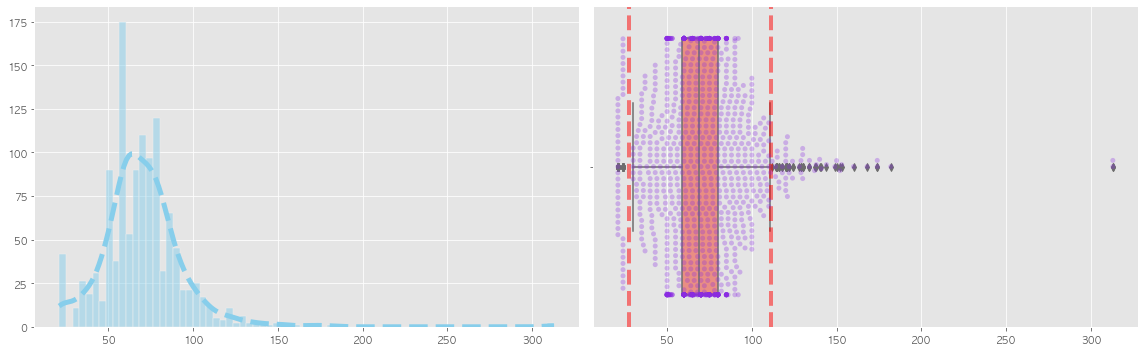

In [30]:
con_data_check(data = modify_data, feature = 'LotFrontage', weight = 1.5)

- IQR방법을 사용하여 가중치를 1.5로 지정했을 때, 88개의 이상치가 존재한다.


- 왼쪽으로 치우친 분포 형태를 나타내고 있으며, 정규분포를 따르고 있지 않는다.

### [2]. LotArea


**LotArea** : Lot size in square feet (집의 크기)

Number of outliers in LotArea : 69 

The mean of LotArea : 10516.8 

The median of LotArea : 9478.5 



,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


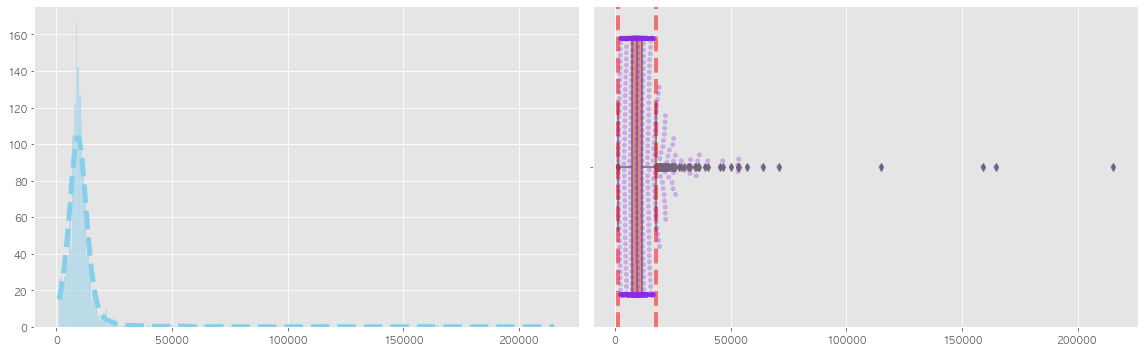

In [31]:
con_data_check(data = modify_data, feature = 'LotArea', weight = 1.5)

- 69개의 이상치가 존재하며, 표준편차가 약 9981의 값으로 매우 큼을 볼 수 있다.


- 표준편차가 매우 큰 값을 가지고 있으므로, 후에 69개의 이상치에 대해서 살펴보자.

### [3]. MasVnrArea - 연속형

**MasVnrArea** : Masonry veneer area in square feet (Masonry veneer area의 면적)

Number of outliers in MasVnrArea : 96 

The mean of MasVnrArea : 103.7 

The median of MasVnrArea : 0.0 



,MasVnrArea
count,1452.000000
mean,103.685262
std,181.066207
min,0.000000
25%,0.000000
50%,0.000000
75%,166.000000
max,1600.000000


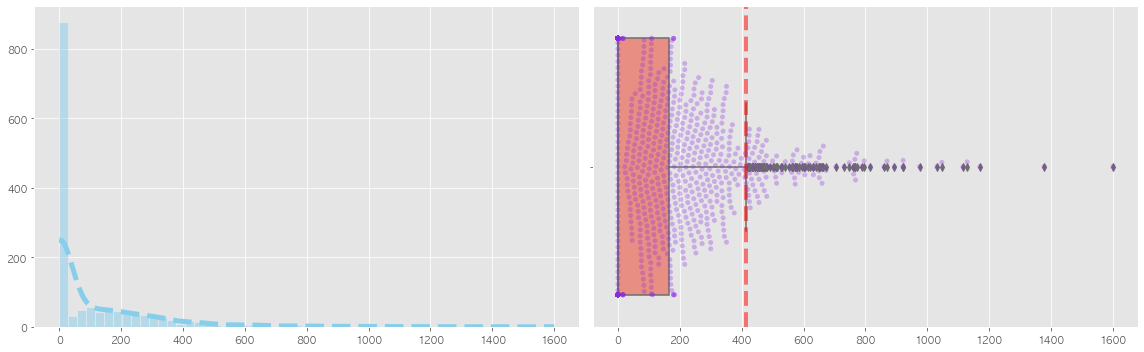

In [32]:
con_data_check(data = modify_data, feature = 'MasVnrArea', weight = 1.5)

- **MasVnrType** 변수의 경우 0의 값이 매우 많음을 볼 수 있는데, 그 이유는 Masonry veneer area가 존재하지 않는 관측치가 있기 때문이다.


- **MasVnrType** 변수와 같이 확인하며, 어떠한 유형이 높은값을 가지고 낮은값을 가지는지 확인해보자.

- **MasVnrType**의 값이 결측치일 때, **MasVnrArea**의 값 역시 결측치임을 확인할 수 있다.


- 결측치의 개수가 8개 뿐이므로 **MasVnrType** 변수에는 **'None'** 의 값을, **MasVnrArea** 변수에는 **'0'** 의 값을 넣어주자

### [4]. BsmtFinSF1 & BsmtFinSF2

**BsmtFinSF1** : Type 1 finished square feet

**BsmtFinSF2** : Type 2 finished square feet

Number of outliers in BsmtFinSF1 : 7 

The mean of BsmtFinSF1 : 443.6 

The median of BsmtFinSF1 : 383.5 



,BsmtFinSF1
count,1460.000000
mean,443.639726
std,456.098091
min,0.000000
25%,0.000000
50%,383.500000
75%,712.250000
max,5644.000000


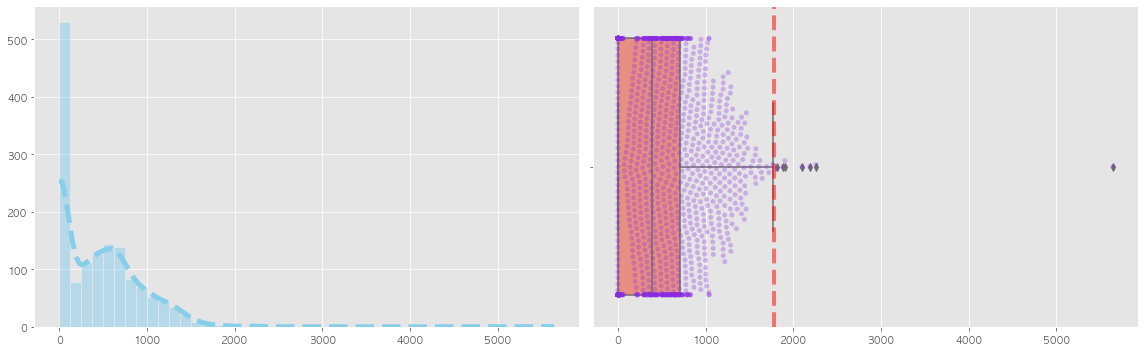

In [33]:
con_data_check(data = modify_data, feature = 'BsmtFinSF1', weight = 1.5)

Number of outliers in BsmtFinSF2 : 167 

The mean of BsmtFinSF2 : 46.5 

The median of BsmtFinSF2 : 0.0 



,BsmtFinSF2
count,1460.000000
mean,46.549315
std,161.319273
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1474.000000


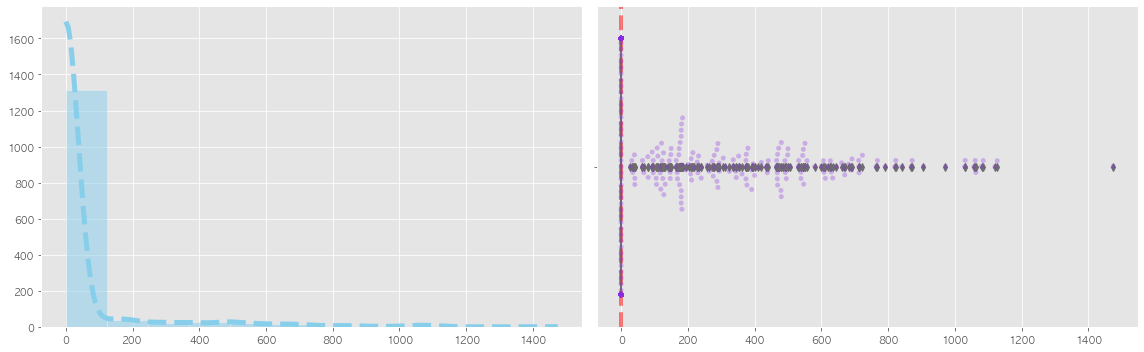

In [34]:
con_data_check(data = modify_data, feature = 'BsmtFinSF2', weight = 1.5)

- **BsmtFinSF1, BsmtFinSF2** 두 변수 모두 0의 관측치가 많음을 볼 수 있다.


- **BsmtFinType1, BsmtFinType2** 두 변수에 **Unf** 범주에 해당하는 관측치가 많아 측정을 할 수가 없기 때문에 0의 값을 가지는 관측치가 많다.


- **BsmtFinType2** 변수의 경우에는 대부분의 관측치가 **Unf** 범주에 해당되며, **BsmtFinSF2** 변수 또한 0의 값을 가지기 때문에 두 변수는 분석에 도움이 되지 않을것으로 판단된다.

### [5]. BsmtUnfSF

**BsmtUnfSF** : Unfinished square feet of basement area

Number of outliers in BsmtUnfSF : 29 

The mean of BsmtUnfSF : 567.2 

The median of BsmtUnfSF : 477.5 



,BsmtUnfSF
count,1460.000000
mean,567.240411
std,441.866955
min,0.000000
25%,223.000000
50%,477.500000
75%,808.000000
max,2336.000000


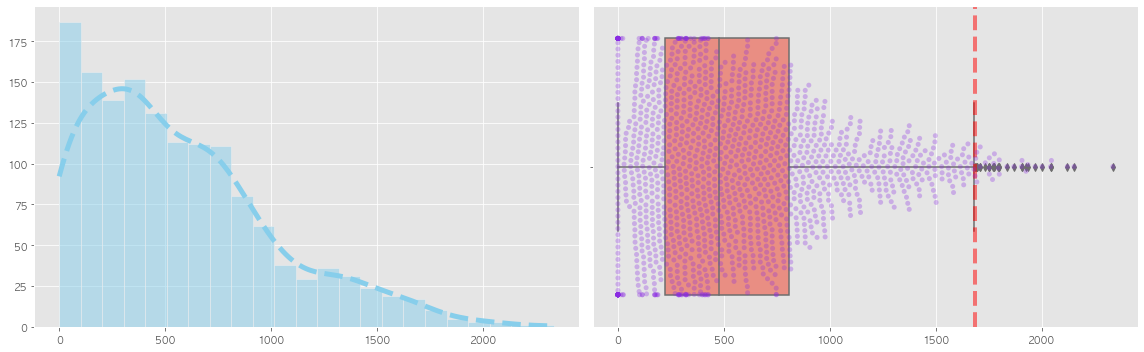

In [35]:
con_data_check(data = modify_data, feature = 'BsmtUnfSF', weight = 1.5)

### [6]. TotalBsmtSF

**TotalBsmtSF** : Total square feet of basement area (지하실 전체 면적)

Number of outliers in TotalBsmtSF : 61 

The mean of TotalBsmtSF : 1057.4 

The median of TotalBsmtSF : 991.5 



,TotalBsmtSF
count,1460.000000
mean,1057.429452
std,438.705324
min,0.000000
25%,795.750000
50%,991.500000
75%,1298.250000
max,6110.000000


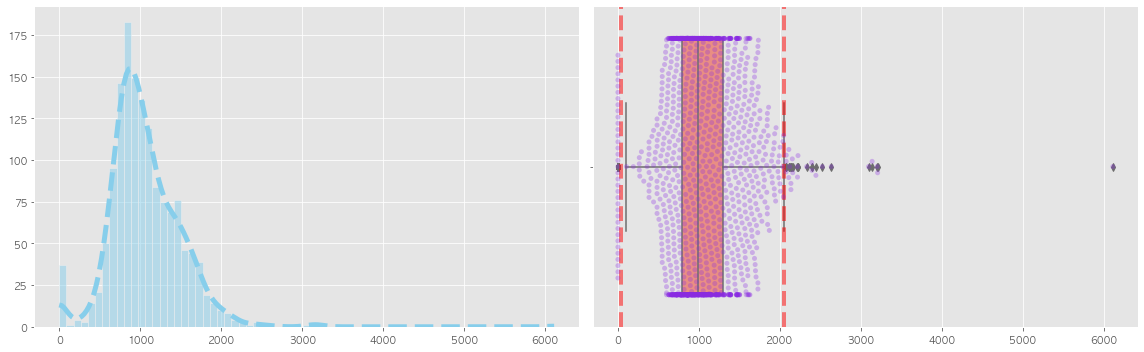

In [36]:
con_data_check(data = modify_data, feature = 'TotalBsmtSF', weight = 1.5)

- **TotalBsmtSF**와 **BsmtFinSF1** 두 변수 사이의 연관성을 파악해보도록 하자.

### [7]. 1stFlrSF

**1stFlrSF** : First Floor square feet (1층의 면적)

Number of outliers in 1stFlrSF : 20 

The mean of 1stFlrSF : 1162.6 

The median of 1stFlrSF : 1087.0 



,1stFlrSF
count,1460.000000
mean,1162.626712
std,386.587738
min,334.000000
25%,882.000000
50%,1087.000000
75%,1391.250000
max,4692.000000


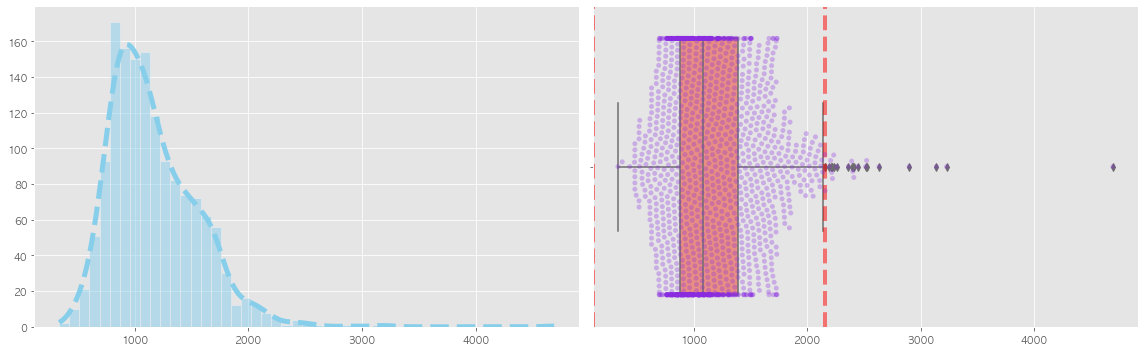

In [37]:
con_data_check(data = modify_data, feature = '1stFlrSF', weight = 1.5)

- **1stFlrSF** 변수의 경우 이상치의 개수가 20개로 적음을 볼 수 있으며, 이상치를 제외하고 보았을 때 정규분포와 비슷하다.

### [8]. 2ndFlrSF

**2ndFlrSF** : Second floor square feet

Number of outliers in 2ndFlrSF : 2 

The mean of 2ndFlrSF : 347.0 

The median of 2ndFlrSF : 0.0 



,2ndFlrSF
count,1460.000000
mean,346.992466
std,436.528436
min,0.000000
25%,0.000000
50%,0.000000
75%,728.000000
max,2065.000000


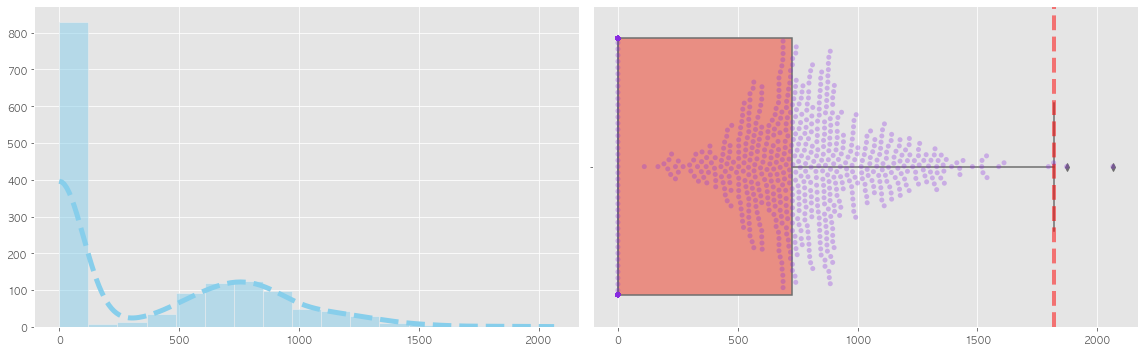

In [38]:
con_data_check(data = modify_data, feature = '2ndFlrSF', weight = 1.5)

- 시각화를 통하여, 절반이 넘는 관측치가 2층을 보유하고 있지 않음을 볼 수 있다.


- 따라서, 2층의 존재 여부를 의미하는 **Exist2nd** 변수를 생성해주자.

In [39]:
# 2층의 여부를 나타내는 변수 만들기
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['Exist2nd'] = np.nan

for index in modify_data.index:
    
    if modify_data.loc[index, '2ndFlrSF'] == 0:
        modify_data.loc[index, 'Exist2nd'] = 0
    
    else:
        modify_data.loc[index, 'Exist2nd'] = 1
        
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')
print('Unique values of Exist2nd :', modify_data['Exist2nd'].unique())

Shape of modify_data *Before Create* : (1460, 81) 

Shape of modify_data *After Create* : (1460, 82) 

Unique values of Exist2nd : [1. 0.]


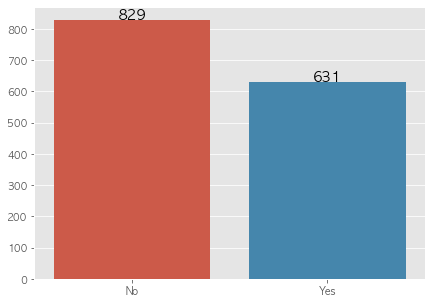

In [40]:
# 'Exist2nd' 시각화
plt.figure(figsize = (7, 5))

plot_data = pd.DataFrame(modify_data['Exist2nd'].value_counts())

sns.barplot(x = plot_data.index, y = 'Exist2nd', data = plot_data)
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.ylabel('')

for index, [value] in enumerate(plot_data.values):
    plt.text(index, value, value, ha = 'center', fontsize = 14)

plt.show()

- 2층의 존재 여부가 아닌, 1층과 2층의 방의 크기가 달라졌을 때 가격의 차이가 있을까?


- **0 : No have**, **1 : Small 2nd**, **2 : Same 2nd**, **3 : Big 2nd**를 의미하는 **ChangeFlr**변수를 만들어 주자.

In [41]:
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['ChangeFlr'] = np.nan

for index in modify_data.index:
    
    first_value = modify_data.loc[index, '1stFlrSF']
    second_value = modify_data.loc[index, '2ndFlrSF']
    
    # 우선 2층이 없다면, 크기를 비교할 수 없으므로 0 대입
    if second_value == 0:
        modify_data.loc[index, 'ChangeFlr'] = 0
        
    elif first_value > second_value:
        modify_data.loc[index, 'ChangeFlr'] = 1
        
    elif first_value == second_value:
        modify_data.loc[index, 'ChangeFlr'] = 2
    
    else:
        modify_data.loc[index, 'ChangeFlr'] = 3
        
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')
print('Unique values of ChangeFlr :', np.sort(modify_data['ChangeFlr'].unique()))

Shape of modify_data *Before Create* : (1460, 82) 

Shape of modify_data *After Create* : (1460, 83) 

Unique values of ChangeFlr : [0. 1. 2. 3.]


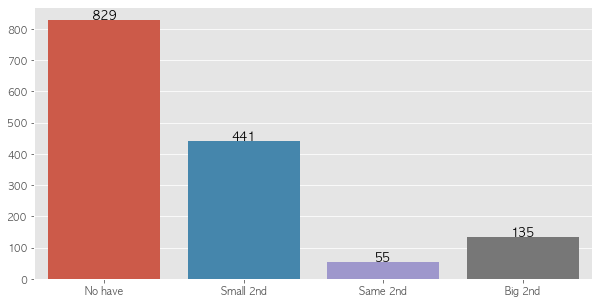

In [42]:
# 'ChangeFlr' 시각화
plt.figure(figsize = (10, 5))

plot_data = pd.DataFrame(modify_data['ChangeFlr'].value_counts().sort_index())

sns.barplot(x = plot_data.index, y = 'ChangeFlr', data = plot_data)
plt.xticks(ticks = [0, 1, 2, 3], labels = ['No have', 'Small 2nd', 'Same 2nd', 'Big 2nd'])
plt.ylabel('')

for index, [value] in enumerate(plot_data.values):
    plt.text(index, value, value, ha = 'center', fontsize = 12)

plt.show()

### [9]. LowQualFinSF

**LowQualFinSF** : Low quality finished square feet (all floors)

Number of outliers in LowQualFinSF : 26 

The mean of LowQualFinSF : 5.8 

The median of LowQualFinSF : 0.0 



,LowQualFinSF
count,1460.000000
mean,5.844521
std,48.623081
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,572.000000


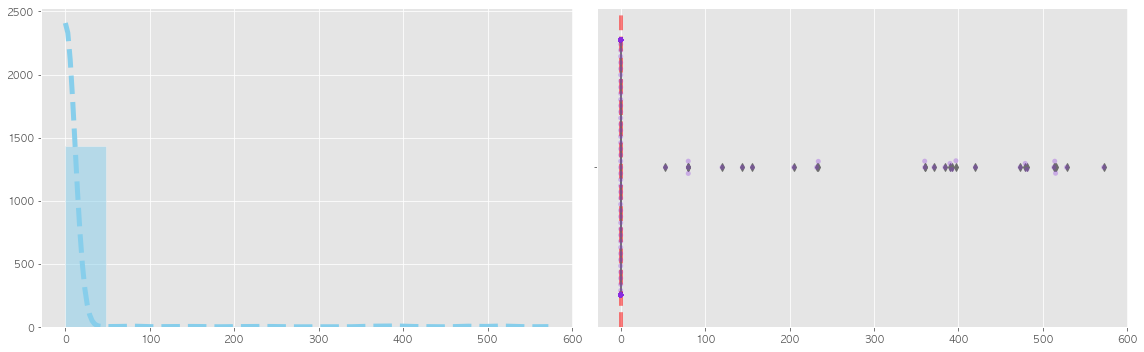

In [43]:
con_data_check(data = modify_data, feature = 'LowQualFinSF', weight = 1.5)

### [10]. GrLivArea

GrLivArea: Above grade (ground) living area square feet (생활 공간의 면적)

Number of outliers in GrLivArea : 31 

The mean of GrLivArea : 1515.5 

The median of GrLivArea : 1464.0 



,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


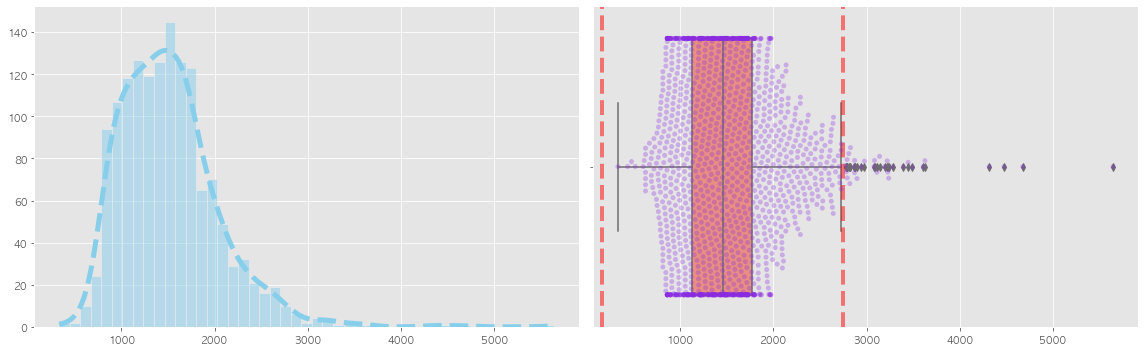

In [44]:
con_data_check(data = modify_data, feature = 'GrLivArea', weight = 1.5)

### [11]. GarageArea

**GarageArea** : Size of garage in square feet (차고의 면적)

Number of outliers in GarageArea : 21 

The mean of GarageArea : 473.0 

The median of GarageArea : 480.0 



,GarageArea
count,1460.000000
mean,472.980137
std,213.804841
min,0.000000
25%,334.500000
50%,480.000000
75%,576.000000
max,1418.000000


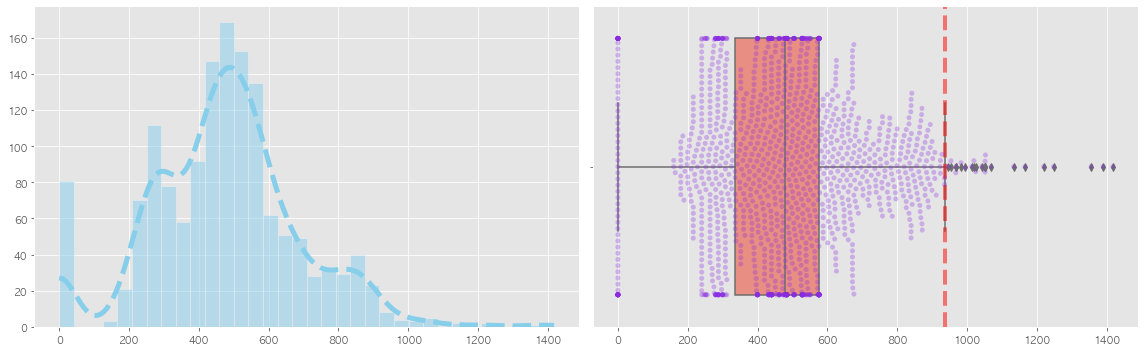

In [45]:
con_data_check(data = modify_data, feature = 'GarageArea', weight = 1.5)

- **GarageArea** 변수는 **GarageCars** 매우 연관이 높을것으로 판단된다.
 
 
- 후에 두 변수사이의 연관성을 파악해 하나의 변수만 사용해주도록 하자.

### [12]. WoodDeckSF

**WoodDeckSF** : Wood deck area in square feet (wood deck의 면적)

Number of outliers in WoodDeckSF : 32 

The mean of WoodDeckSF : 94.2 

The median of WoodDeckSF : 0.0 



,WoodDeckSF
count,1460.000000
mean,94.244521
std,125.338794
min,0.000000
25%,0.000000
50%,0.000000
75%,168.000000
max,857.000000


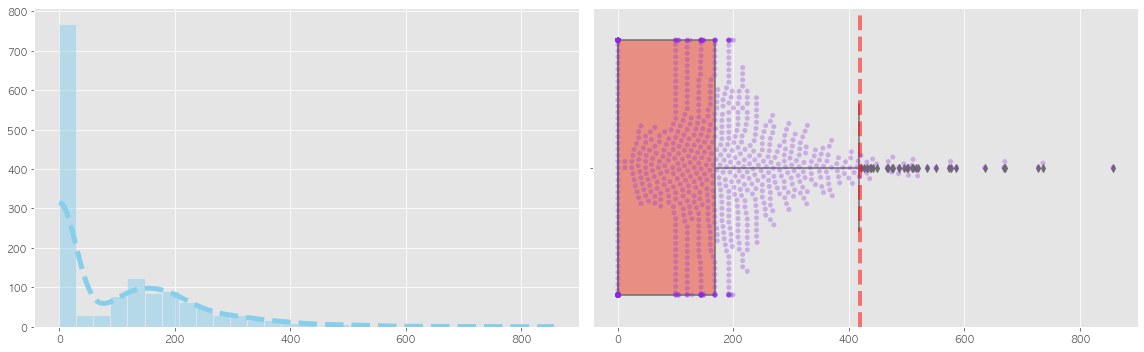

In [46]:
con_data_check(data = modify_data, feature = 'WoodDeckSF', weight = 1.5)

### [13]. OpenPorchSF

**OpenPorchSF** : Open porch area in square feet (Open porch의 면적)

Number of outliers in OpenPorchSF : 77 

The mean of OpenPorchSF : 46.7 

The median of OpenPorchSF : 25.0 



,OpenPorchSF
count,1460.000000
mean,46.660274
std,66.256028
min,0.000000
25%,0.000000
50%,25.000000
75%,68.000000
max,547.000000


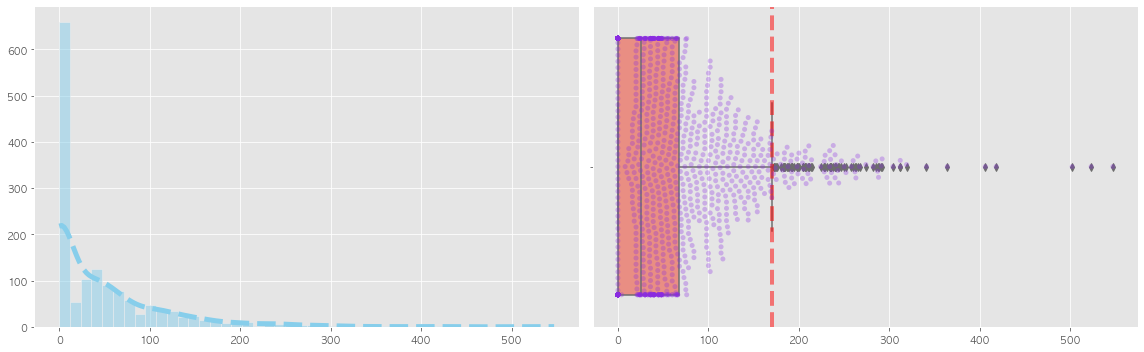

In [47]:
con_data_check(data = modify_data, feature = 'OpenPorchSF', weight = 1.5)

### [14]. EnclosedPorch

**EnclosedPorch** : Enclosed porch area in square feet (Enclosed porch의 면적)

Number of outliers in EnclosedPorch : 208 

The mean of EnclosedPorch : 22.0 

The median of EnclosedPorch : 0.0 



,EnclosedPorch
count,1460.000000
mean,21.954110
std,61.119149
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,552.000000


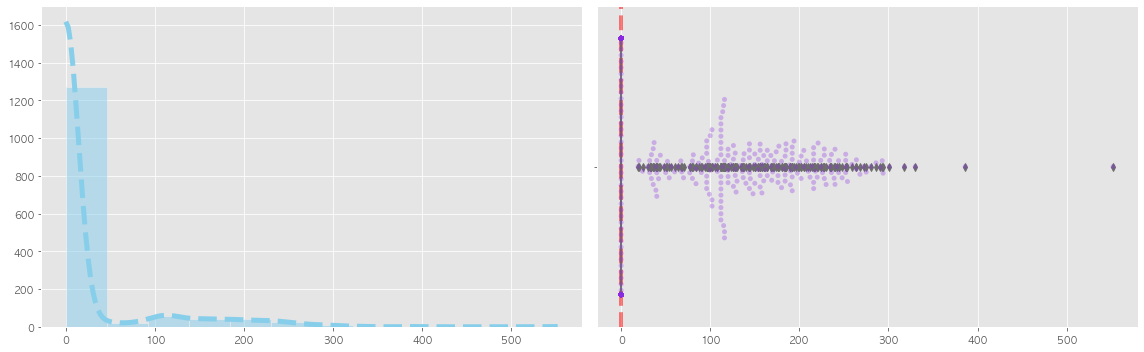

In [48]:
con_data_check(data = modify_data, feature = 'EnclosedPorch', weight = 1.5)

### [15]. 3SsnPorch

**3SsnPorch** : Three season porch area in square feet

Number of outliers in 3SsnPorch : 24 

The mean of 3SsnPorch : 3.4 

The median of 3SsnPorch : 0.0 



,3SsnPorch
count,1460.000000
mean,3.409589
std,29.317331
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,508.000000


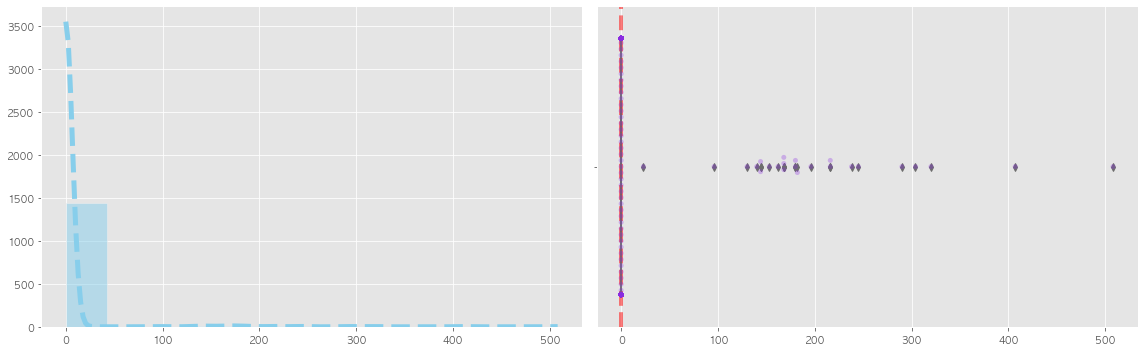

In [49]:
con_data_check(data = modify_data, feature = '3SsnPorch', weight = 1.5)

### [16]. ScreenPorch

**ScreenPorch** : Screen porch area in square feet

Number of outliers in ScreenPorch : 116 

The mean of ScreenPorch : 15.1 

The median of ScreenPorch : 0.0 



,ScreenPorch
count,1460.000000
mean,15.060959
std,55.757415
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,480.000000


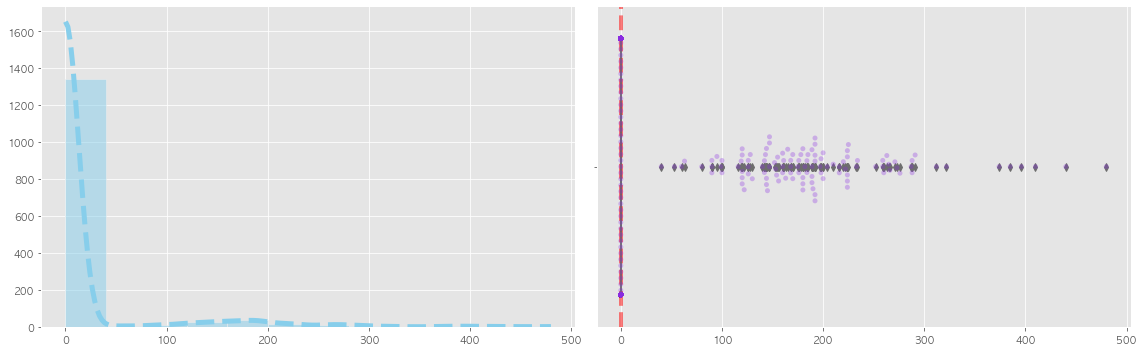

In [50]:
con_data_check(data = modify_data, feature = 'ScreenPorch', weight = 1.5)

- **OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch** 총 4개의 변수는 Porch 시설의 각 유형에 따른 면적을 나타내는 변수이다.


- 4개의 변수 모두 0의 값을 갖는 관측치가 많기 때문에, 4개의 변수를 이용하여 새로운 변수를 만들어주도록 하자.

### [17]. PoolArea

**PoolArea** : Pool area in square feet (Pool의 면적)

Number of outliers in PoolArea : 7 

The mean of PoolArea : 2.8 

The median of PoolArea : 0.0 



,PoolArea
count,1460.000000
mean,2.758904
std,40.177307
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,738.000000


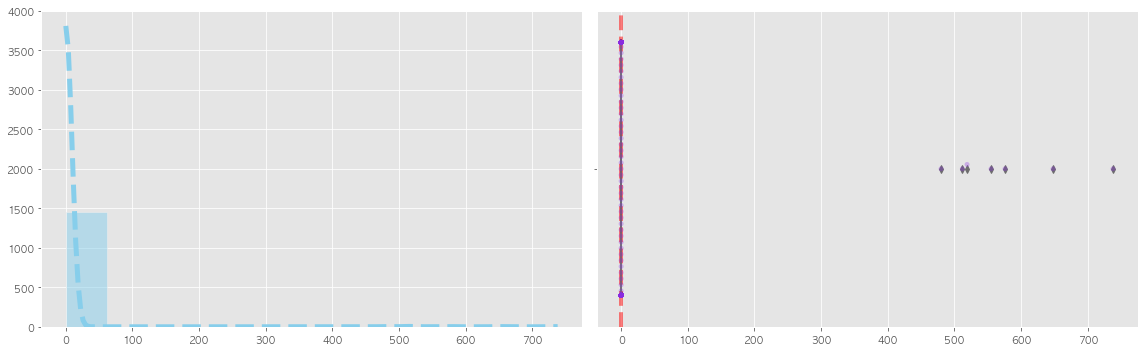

In [51]:
con_data_check(data = modify_data, feature = 'PoolArea', weight = 1.5)

- **PoolQc** 변수를 통하여 대부분의 관측치가 Pool을 가지고 있지 않음을 알고 있다.


- 즉, 해당 시설이 없으면 측정할 면적이 없기 때문에 **PoolArea** 변수도 0의 값을 가지고 있느 관측치가 많다.


- 따라서 **PoolQc, PoolArea** 두 변수는 분석에 도움이 되지 않을것으로 판단된다.

### [18]. MiscVal

**MiscVal**: $Value of miscellaneous feature (기타 기능의 가치)

Number of outliers in MiscVal : 52 

The mean of MiscVal : 43.5 

The median of MiscVal : 0.0 



,MiscVal
count,1460.000000
mean,43.489041
std,496.123024
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,15500.000000


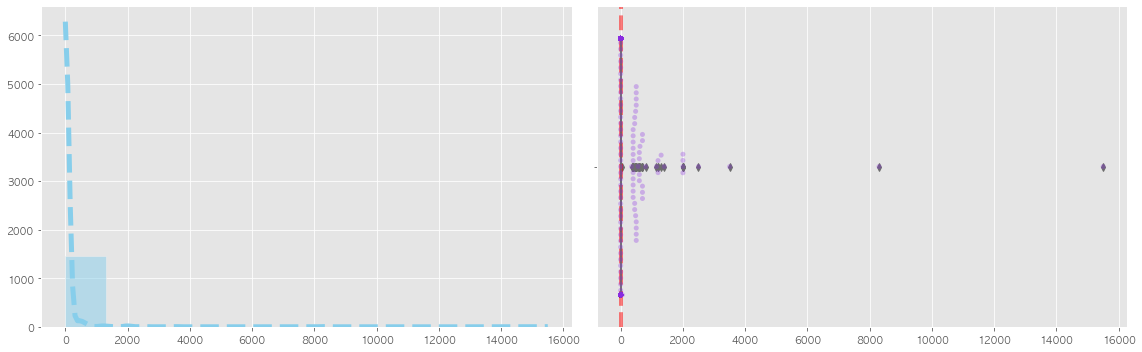

In [52]:
con_data_check(data = modify_data, feature = 'MiscVal', weight = 1.5)

### [18]. SalePrice - Target Variable

Number of outliers in SalePrice : 61 

The mean of SalePrice : 180921.2 

The median of SalePrice : 163000.0 



,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


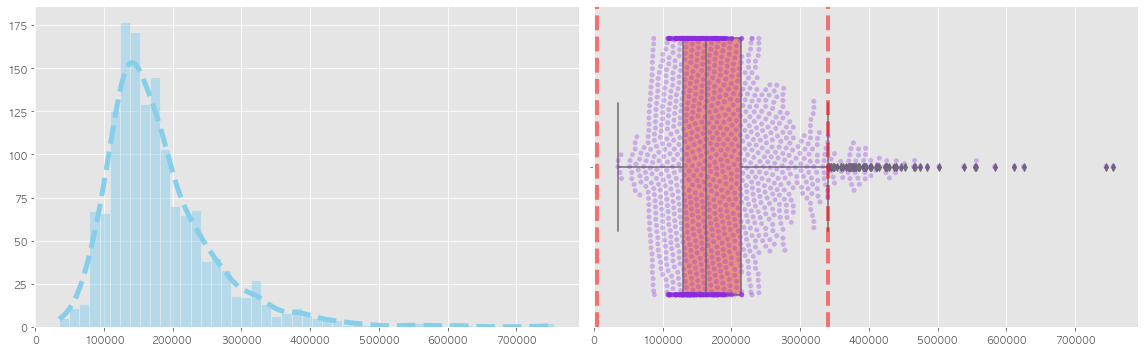

In [53]:
con_data_check(data = modify_data, feature = 'SalePrice', weight = 1.5)

- 종속변수는 **SalePrice** 이며, 정규분포를 따르지 않음을 볼 수 있다.


- 로그화를 수행해준 뒤 확인해보도록 하자.

In [54]:
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['LogSalePrice'] = modify_data['SalePrice'].apply(lambda x: np.log(x))
print('Shape of modify_data *After Create* :', modify_data.shape)

Shape of modify_data *Before Create* : (1460, 83) 

Shape of modify_data *After Create* : (1460, 84)


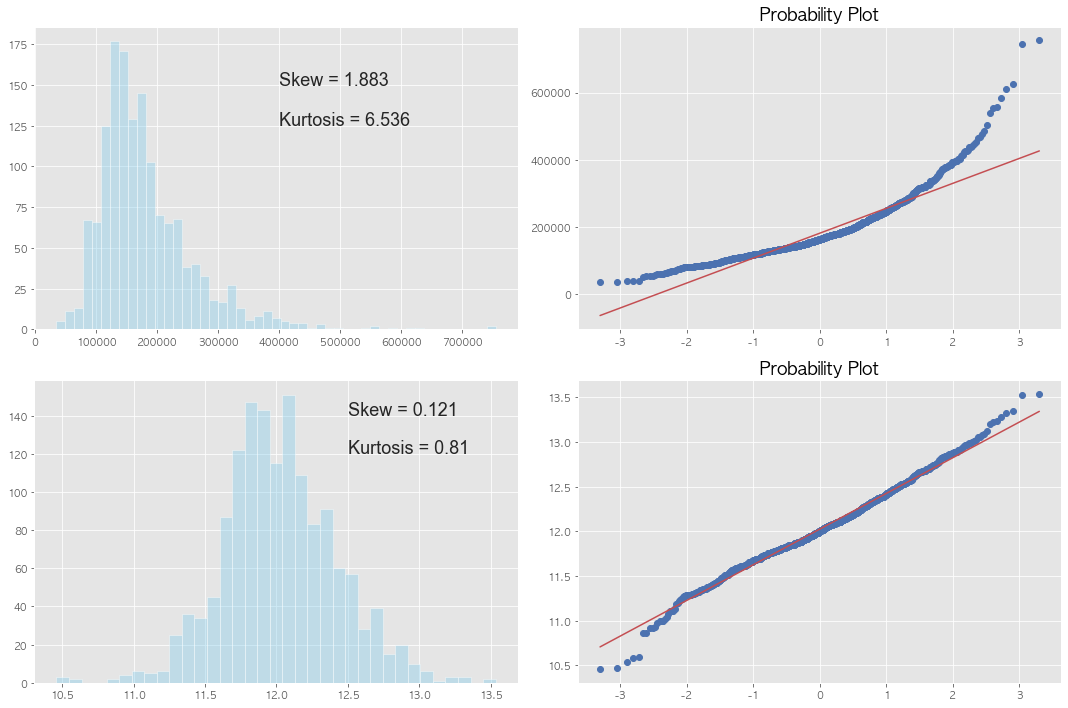

In [55]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
sns.set(font_scale = 1.5)

# 'SalePrice' 변수의 왜도와 첨도 저장
price_skew = 'Skew = {}'.format(round(modify_data['SalePrice'].skew(), 3))
price_kurtosis = 'Kurtosis = {}'.format(round(modify_data['SalePrice'].kurtosis(), 3)) 

# 'LogSalePrice' 변수의 왜도와 첨도 저장
log_skew = 'Skew = {}'.format(round(modify_data['LogSalePrice'].skew(), 3))
log_kurtosis = 'Kurtosis = {}'.format(round(modify_data['LogSalePrice'].kurtosis(), 3))

# SalePrice
sns.distplot(modify_data['SalePrice'], color = 'skyblue', kde = False, ax = axes[0][0])
axes[0][0].text(400000, 150, price_skew)
axes[0][0].text(400000, 125, price_kurtosis)
axes[0][0].set_xlabel('')

stats.probplot(modify_data['SalePrice'], plot = axes[0][1])
axes[0][1].set_xlabel('')
axes[0][1].set_ylabel('')

# 'LogSalePrice'
sns.distplot(modify_data['LogSalePrice'], color = 'skyblue', kde = False, ax = axes[1][0])
axes[1][0].text(12.5, 140, log_skew)
axes[1][0].text(12.5, 120, log_kurtosis)
axes[1][0].set_xlabel('')

stats.probplot(modify_data['LogSalePrice'], plot = axes[1][1])
axes[1][1].set_xlabel('')
axes[1][1].set_ylabel('')

sns.set(font_scale = 1)
fig.tight_layout()

- 로그화를 수행해준 뒤, 완벽히 정규분포를 따른다고 할 수 없지만 기존 변수보다 정규분포를 따르고 있다.

Number of outliers in LogSalePrice : 28 

The mean of LogSalePrice : 12.0 

The median of LogSalePrice : 12.0 



,LogSalePrice
count,1460.000000
mean,12.024051
std,0.399452
min,10.460242
25%,11.775097
50%,12.001505
75%,12.273731
max,13.534473


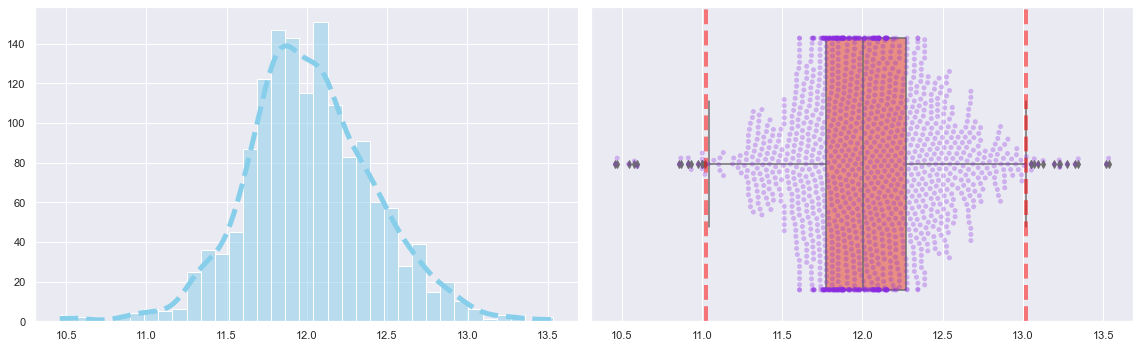

In [56]:
con_data_check(data = modify_data, feature = 'LogSalePrice', weight = 1.5)